# Tache 3
### Réalisée par Maceo

L'historique des tests est présenté dans le rapport, ici, l'entrainement fonctionnel et la vidéo

In [1]:
!pip install stable-baselines3[extra] highway-env


/bin/bash: /home/maceodrz/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np
import time
from tqdm import tqdm
import highway_env
import torch
import torch.nn as nn
from copy import deepcopy

In [4]:
config_dict = {
    "observation": {
        "type": "TimeToCollision",
        "vehicles_count": 10,
        "features": ["presence", "x", "y", "vx", "vy", "cos_h", "sin_h", "ttc", "heading"],
        "features_range": {
            "x": [-100, 100],
            "y": [-100, 100],
            "vx": [-20, 20],
            "vy": [-20, 20],
            "ttc": [0, 10],
        },
        "grid_size": [[-20, 20], [-20, 20]],
        "grid_step": [5, 5],
        "absolute": False,
    },
    "action": {
        "type": "DiscreteMetaAction",
    },
    "lanes_count": 4,
    "vehicles_count": 15,
    "duration": 60,  # [s]
    "initial_spacing": 1,
    "collision_reward": -2,  # The reward received when colliding with a vehicle.
    "right_lane_reward": 0.2,  # The reward received when driving on the right-most lanes, linearly mapped to
    # zero for other lanes.
    "high_speed_reward": 0.4,  # The reward received when driving at full speed, linearly mapped to zero for
    # lower speeds according to config["reward_speed_range"].
    "lane_change_reward": -0.2,
    "reward_speed_range": [
        20,
        29,
    ],  # [m/s] The reward for high speed is mapped linearly from this range to [0, HighwayEnv.HIGH_SPEED_REWARD].
    "simulation_frequency": 10,  # [Hz]
    "policy_frequency": 1,  # [Hz]
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",
    "screen_width": 600,  # [px]
    "screen_height": 150,  # [px]
    "centering_position": [0.3, 0.5],
    "scaling": 5.5,
    "show_trajectories": True,
    "render_agent": True,
    "offscreen_rendering": False,
    "disable_collision_checks": False,
}

env = gym.make("highway-fast-v0", render_mode="rgb_array", config = config_dict)
env.reset()

(array([[[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ]],
 
        [[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ]],
 
        [[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 1. , 1. ],
         [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ]]],
       dtype=float32),
 {'speed': 25,
  'crashed': False,
  'action': 0,
  'rewards': {'collision_reward': 0.0,
   'right_lane_reward': 1.0,
   'high_speed_reward': 0.5555555555555556,
   'on_road_reward': 1.0}})

In [10]:
import gymnasium as gym
import highway_env
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

# Configure environment
env = gym.make("highway-fast-v0", render_mode="rgb_array", config=config_dict)

env.reset()

# Instantiate model
model = DQN("MlpPolicy",
            env,
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=1e-3,
            buffer_size=15000,
            learning_starts=100,
            gamma=0.95,
            train_freq=1,
            target_update_interval=50,
            verbose=1,
            tensorboard_log="./highway_dqn/")


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [11]:
model.learn(total_timesteps=20000, progress_bar=True)
model.save("dqn_highway_14")


Logging to ./highway_dqn/DQN_30


Output()

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 15.2     |
|    exploration_rate | 0.965    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 34       |
|    time_elapsed     | 2        |
|    total_timesteps  | 73       |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 11.1     |
|    exploration_rate | 0.949    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 33       |
|    time_elapsed     | 3        |
|    total_timesteps  | 107      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.175    |
|    n_updates        | 6        |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.927    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 31       |
|    time_elapsed     | 4        |
|    total_timesteps  | 153      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.239    |
|    n_updates        | 52       |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.2     |
|    ep_rew_mean      | 9.24     |
|    exploration_rate | 0.914    |
| time/               |          |
|    episodes         | 16       |
|    fps              | 30       |
|    time_elapsed     | 5        |
|    total_timesteps  | 180      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0866   |
|    n_updates        | 79       |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.2     |
|    ep_rew_mean      | 9.18     |
|    exploration_rate | 0.894    |
| time/               |          |
|    episodes         | 20       |
|    fps              | 29       |
|    time_elapsed     | 7        |
|    total_timesteps  | 224      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0845   |
|    n_updates        | 123      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 8.31     |
|    exploration_rate | 0.884    |
| time/               |          |
|    episodes         | 24       |
|    fps              | 29       |
|    time_elapsed     | 8        |
|    total_timesteps  | 245      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.155    |
|    n_updates        | 144      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.54     |
|    ep_rew_mean      | 7.72     |
|    exploration_rate | 0.873    |
| time/               |          |
|    episodes         | 28       |
|    fps              | 29       |
|    time_elapsed     | 9        |
|    total_timesteps  | 267      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.147    |
|    n_updates        | 166      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.7     |
|    ep_rew_mean      | 8.65     |
|    exploration_rate | 0.837    |
| time/               |          |
|    episodes         | 32       |
|    fps              | 28       |
|    time_elapsed     | 11       |
|    total_timesteps  | 343      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0704   |
|    n_updates        | 242      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 9.24     |
|    exploration_rate | 0.806    |
| time/               |          |
|    episodes         | 36       |
|    fps              | 28       |
|    time_elapsed     | 14       |
|    total_timesteps  | 409      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.199    |
|    n_updates        | 308      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.762    |
| time/               |          |
|    episodes         | 40       |
|    fps              | 27       |
|    time_elapsed     | 17       |
|    total_timesteps  | 500      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.169    |
|    n_updates        | 399      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 11.3     |
|    exploration_rate | 0.713    |
| time/               |          |
|    episodes         | 44       |
|    fps              | 27       |
|    time_elapsed     | 21       |
|    total_timesteps  | 605      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.154    |
|    n_updates        | 504      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 10.9     |
|    exploration_rate | 0.697    |
| time/               |          |
|    episodes         | 48       |
|    fps              | 27       |
|    time_elapsed     | 22       |
|    total_timesteps  | 638      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.162    |
|    n_updates        | 537      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 11.9     |
|    exploration_rate | 0.644    |
| time/               |          |
|    episodes         | 52       |
|    fps              | 27       |
|    time_elapsed     | 27       |
|    total_timesteps  | 750      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.221    |
|    n_updates        | 649      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.604    |
| time/               |          |
|    episodes         | 56       |
|    fps              | 25       |
|    time_elapsed     | 32       |
|    total_timesteps  | 833      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.065    |
|    n_updates        | 732      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 12.6     |
|    exploration_rate | 0.564    |
| time/               |          |
|    episodes         | 60       |
|    fps              | 25       |
|    time_elapsed     | 35       |
|    total_timesteps  | 918      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.382    |
|    n_updates        | 817      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 12.8     |
|    exploration_rate | 0.529    |
| time/               |          |
|    episodes         | 64       |
|    fps              | 25       |
|    time_elapsed     | 38       |
|    total_timesteps  | 991      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.259    |
|    n_updates        | 890      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 12.9     |
|    exploration_rate | 0.496    |
| time/               |          |
|    episodes         | 68       |
|    fps              | 25       |
|    time_elapsed     | 41       |
|    total_timesteps  | 1062     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.407    |
|    n_updates        | 961      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 12.6     |
|    exploration_rate | 0.479    |
| time/               |          |
|    episodes         | 72       |
|    fps              | 25       |
|    time_elapsed     | 42       |
|    total_timesteps  | 1096     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.499    |
|    n_updates        | 995      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 12.4     |
|    exploration_rate | 0.457    |
| time/               |          |
|    episodes         | 76       |
|    fps              | 25       |
|    time_elapsed     | 44       |
|    total_timesteps  | 1143     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.244    |
|    n_updates        | 1042     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 14.2     |
|    exploration_rate | 0.352    |
| time/               |          |
|    episodes         | 80       |
|    fps              | 26       |
|    time_elapsed     | 52       |
|    total_timesteps  | 1365     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.154    |
|    n_updates        | 1264     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 14.1     |
|    exploration_rate | 0.322    |
| time/               |          |
|    episodes         | 84       |
|    fps              | 26       |
|    time_elapsed     | 54       |
|    total_timesteps  | 1427     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.461    |
|    n_updates        | 1326     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 14.5     |
|    exploration_rate | 0.269    |
| time/               |          |
|    episodes         | 88       |
|    fps              | 26       |
|    time_elapsed     | 59       |
|    total_timesteps  | 1540     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.271    |
|    n_updates        | 1439     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 15.3     |
|    exploration_rate | 0.197    |
| time/               |          |
|    episodes         | 92       |
|    fps              | 25       |
|    time_elapsed     | 66       |
|    total_timesteps  | 1691     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.188    |
|    n_updates        | 1590     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.3     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.122    |
| time/               |          |
|    episodes         | 96       |
|    fps              | 25       |
|    time_elapsed     | 73       |
|    total_timesteps  | 1849     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.251    |
|    n_updates        | 1748     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.9     |
|    ep_rew_mean      | 17.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 100      |
|    fps              | 25       |
|    time_elapsed     | 81       |
|    total_timesteps  | 2089     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.201    |
|    n_updates        | 1988     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.4     |
|    ep_rew_mean      | 18.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 104      |
|    fps              | 25       |
|    time_elapsed     | 89       |
|    total_timesteps  | 2316     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.152    |
|    n_updates        | 2215     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.9     |
|    ep_rew_mean      | 20.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 108      |
|    fps              | 25       |
|    time_elapsed     | 99       |
|    total_timesteps  | 2499     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.258    |
|    n_updates        | 2398     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.4     |
|    ep_rew_mean      | 21.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 112      |
|    fps              | 25       |
|    time_elapsed     | 106      |
|    total_timesteps  | 2689     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.323    |
|    n_updates        | 2588     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.5     |
|    ep_rew_mean      | 23.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 116      |
|    fps              | 25       |
|    time_elapsed     | 115      |
|    total_timesteps  | 2929     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.287    |
|    n_updates        | 2828     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.4     |
|    ep_rew_mean      | 25       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 120      |
|    fps              | 25       |
|    time_elapsed     | 123      |
|    total_timesteps  | 3169     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.343    |
|    n_updates        | 3068     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.6     |
|    ep_rew_mean      | 26.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 124      |
|    fps              | 25       |
|    time_elapsed     | 134      |
|    total_timesteps  | 3409     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.68     |
|    n_updates        | 3308     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.3     |
|    ep_rew_mean      | 28.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 128      |
|    fps              | 25       |
|    time_elapsed     | 141      |
|    total_timesteps  | 3593     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.192    |
|    n_updates        | 3492     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.9     |
|    ep_rew_mean      | 29.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 132      |
|    fps              | 25       |
|    time_elapsed     | 150      |
|    total_timesteps  | 3833     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.114    |
|    n_updates        | 3732     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.6     |
|    ep_rew_mean      | 31.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 136      |
|    fps              | 25       |
|    time_elapsed     | 158      |
|    total_timesteps  | 4073     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.128    |
|    n_updates        | 3972     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.1     |
|    ep_rew_mean      | 32.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 140      |
|    fps              | 25       |
|    time_elapsed     | 168      |
|    total_timesteps  | 4313     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.213    |
|    n_updates        | 4212     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 39.2     |
|    ep_rew_mean      | 33.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 144      |
|    fps              | 25       |
|    time_elapsed     | 176      |
|    total_timesteps  | 4528     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.314    |
|    n_updates        | 4427     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40.6     |
|    ep_rew_mean      | 34.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 148      |
|    fps              | 25       |
|    time_elapsed     | 183      |
|    total_timesteps  | 4702     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0677   |
|    n_updates        | 4601     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.9     |
|    ep_rew_mean      | 36.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 152      |
|    fps              | 25       |
|    time_elapsed     | 191      |
|    total_timesteps  | 4942     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.152    |
|    n_updates        | 4841     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43.3     |
|    ep_rew_mean      | 37.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 156      |
|    fps              | 25       |
|    time_elapsed     | 199      |
|    total_timesteps  | 5160     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0959   |
|    n_updates        | 5059     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 44.8     |
|    ep_rew_mean      | 38.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 160      |
|    fps              | 25       |
|    time_elapsed     | 211      |
|    total_timesteps  | 5400     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.133    |
|    n_updates        | 5299     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 46.5     |
|    ep_rew_mean      | 40.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 164      |
|    fps              | 25       |
|    time_elapsed     | 219      |
|    total_timesteps  | 5640     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.128    |
|    n_updates        | 5539     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48.2     |
|    ep_rew_mean      | 41.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 168      |
|    fps              | 25       |
|    time_elapsed     | 227      |
|    total_timesteps  | 5880     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0513   |
|    n_updates        | 5779     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.2     |
|    ep_rew_mean      | 43.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 172      |
|    fps              | 25       |
|    time_elapsed     | 237      |
|    total_timesteps  | 6120     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.115    |
|    n_updates        | 6019     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.3     |
|    ep_rew_mean      | 44.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 176      |
|    fps              | 25       |
|    time_elapsed     | 243      |
|    total_timesteps  | 6270     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.108    |
|    n_updates        | 6169     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.5     |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 180      |
|    fps              | 25       |
|    time_elapsed     | 252      |
|    total_timesteps  | 6510     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0432   |
|    n_updates        | 6409     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53.2     |
|    ep_rew_mean      | 46.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 184      |
|    fps              | 25       |
|    time_elapsed     | 260      |
|    total_timesteps  | 6750     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.253    |
|    n_updates        | 6649     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.5     |
|    ep_rew_mean      | 47.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 188      |
|    fps              | 26       |
|    time_elapsed     | 268      |
|    total_timesteps  | 6990     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.204    |
|    n_updates        | 6889     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 55.4     |
|    ep_rew_mean      | 48.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 192      |
|    fps              | 25       |
|    time_elapsed     | 279      |
|    total_timesteps  | 7230     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0948   |
|    n_updates        | 7129     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56.2     |
|    ep_rew_mean      | 49.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 196      |
|    fps              | 25       |
|    time_elapsed     | 288      |
|    total_timesteps  | 7470     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.139    |
|    n_updates        | 7369     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56       |
|    ep_rew_mean      | 49.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 200      |
|    fps              | 25       |
|    time_elapsed     | 295      |
|    total_timesteps  | 7686     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.366    |
|    n_updates        | 7585     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56.1     |
|    ep_rew_mean      | 49.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 204      |
|    fps              | 25       |
|    time_elapsed     | 306      |
|    total_timesteps  | 7926     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.116    |
|    n_updates        | 7825     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56.1     |
|    ep_rew_mean      | 49.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 208      |
|    fps              | 25       |
|    time_elapsed     | 313      |
|    total_timesteps  | 8114     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.207    |
|    n_updates        | 8013     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56.1     |
|    ep_rew_mean      | 49.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 212      |
|    fps              | 25       |
|    time_elapsed     | 320      |
|    total_timesteps  | 8297     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.064    |
|    n_updates        | 8196     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 55.7     |
|    ep_rew_mean      | 49.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 216      |
|    fps              | 25       |
|    time_elapsed     | 327      |
|    total_timesteps  | 8496     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0875   |
|    n_updates        | 8395     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.6     |
|    ep_rew_mean      | 48.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 220      |
|    fps              | 25       |
|    time_elapsed     | 332      |
|    total_timesteps  | 8632     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0826   |
|    n_updates        | 8531     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54       |
|    ep_rew_mean      | 47.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 224      |
|    fps              | 25       |
|    time_elapsed     | 340      |
|    total_timesteps  | 8807     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0708   |
|    n_updates        | 8706     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.5     |
|    ep_rew_mean      | 48.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 228      |
|    fps              | 25       |
|    time_elapsed     | 349      |
|    total_timesteps  | 9047     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.128    |
|    n_updates        | 8946     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.5     |
|    ep_rew_mean      | 48.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 232      |
|    fps              | 25       |
|    time_elapsed     | 357      |
|    total_timesteps  | 9287     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.123    |
|    n_updates        | 9186     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.4     |
|    ep_rew_mean      | 48.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 236      |
|    fps              | 26       |
|    time_elapsed     | 365      |
|    total_timesteps  | 9508     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.061    |
|    n_updates        | 9407     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.4     |
|    ep_rew_mean      | 48.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 240      |
|    fps              | 25       |
|    time_elapsed     | 375      |
|    total_timesteps  | 9748     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0694   |
|    n_updates        | 9647     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.6     |
|    ep_rew_mean      | 48.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 244      |
|    fps              | 25       |
|    time_elapsed     | 384      |
|    total_timesteps  | 9988     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0786   |
|    n_updates        | 9887     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.8     |
|    ep_rew_mean      | 48.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 248      |
|    fps              | 26       |
|    time_elapsed     | 391      |
|    total_timesteps  | 10185    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.132    |
|    n_updates        | 10084    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.3     |
|    ep_rew_mean      | 48.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 252      |
|    fps              | 26       |
|    time_elapsed     | 398      |
|    total_timesteps  | 10374    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0589   |
|    n_updates        | 10273    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.4     |
|    ep_rew_mean      | 48.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 256      |
|    fps              | 26       |
|    time_elapsed     | 405      |
|    total_timesteps  | 10598    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.115    |
|    n_updates        | 10497    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.3     |
|    ep_rew_mean      | 48.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 260      |
|    fps              | 26       |
|    time_elapsed     | 416      |
|    total_timesteps  | 10833    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.187    |
|    n_updates        | 10732    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.3     |
|    ep_rew_mean      | 48.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 264      |
|    fps              | 26       |
|    time_elapsed     | 425      |
|    total_timesteps  | 11066    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0868   |
|    n_updates        | 10965    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.1     |
|    ep_rew_mean      | 48.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 268      |
|    fps              | 26       |
|    time_elapsed     | 433      |
|    total_timesteps  | 11293    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.179    |
|    n_updates        | 11192    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.1     |
|    ep_rew_mean      | 48.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 272      |
|    fps              | 25       |
|    time_elapsed     | 443      |
|    total_timesteps  | 11532    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0679   |
|    n_updates        | 11431    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.5     |
|    ep_rew_mean      | 48.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 276      |
|    fps              | 26       |
|    time_elapsed     | 450      |
|    total_timesteps  | 11725    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0702   |
|    n_updates        | 11624    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.5     |
|    ep_rew_mean      | 48.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 280      |
|    fps              | 26       |
|    time_elapsed     | 458      |
|    total_timesteps  | 11957    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0977   |
|    n_updates        | 11856    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53.8     |
|    ep_rew_mean      | 48.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 284      |
|    fps              | 26       |
|    time_elapsed     | 464      |
|    total_timesteps  | 12131    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.105    |
|    n_updates        | 12030    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53.1     |
|    ep_rew_mean      | 47.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 288      |
|    fps              | 26       |
|    time_elapsed     | 470      |
|    total_timesteps  | 12296    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.115    |
|    n_updates        | 12195    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53.1     |
|    ep_rew_mean      | 47.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 292      |
|    fps              | 26       |
|    time_elapsed     | 480      |
|    total_timesteps  | 12536    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0495   |
|    n_updates        | 12435    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.2     |
|    ep_rew_mean      | 46.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 296      |
|    fps              | 26       |
|    time_elapsed     | 485      |
|    total_timesteps  | 12686    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0537   |
|    n_updates        | 12585    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.4     |
|    ep_rew_mean      | 47.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 300      |
|    fps              | 26       |
|    time_elapsed     | 493      |
|    total_timesteps  | 12926    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0284   |
|    n_updates        | 12825    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.6     |
|    ep_rew_mean      | 46.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 304      |
|    fps              | 26       |
|    time_elapsed     | 499      |
|    total_timesteps  | 13091    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0758   |
|    n_updates        | 12990    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51       |
|    ep_rew_mean      | 45.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 308      |
|    fps              | 26       |
|    time_elapsed     | 504      |
|    total_timesteps  | 13219    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.15     |
|    n_updates        | 13118    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51       |
|    ep_rew_mean      | 46       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 312      |
|    fps              | 26       |
|    time_elapsed     | 513      |
|    total_timesteps  | 13402    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0555   |
|    n_updates        | 13301    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.9     |
|    ep_rew_mean      | 46       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 316      |
|    fps              | 26       |
|    time_elapsed     | 519      |
|    total_timesteps  | 13589    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.583    |
|    n_updates        | 13488    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.6     |
|    ep_rew_mean      | 46.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 320      |
|    fps              | 26       |
|    time_elapsed     | 527      |
|    total_timesteps  | 13790    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0658   |
|    n_updates        | 13689    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.1     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 324      |
|    fps              | 26       |
|    time_elapsed     | 531      |
|    total_timesteps  | 13916    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0451   |
|    n_updates        | 13815    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.1     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 26       |
|    time_elapsed     | 540      |
|    total_timesteps  | 14156    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.135    |
|    n_updates        | 14055    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.9     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 26       |
|    time_elapsed     | 550      |
|    total_timesteps  | 14379    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.243    |
|    n_updates        | 14278    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.1     |
|    ep_rew_mean      | 46.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 336      |
|    fps              | 26       |
|    time_elapsed     | 559      |
|    total_timesteps  | 14619    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0799   |
|    n_updates        | 14518    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.1     |
|    ep_rew_mean      | 46.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 340      |
|    fps              | 26       |
|    time_elapsed     | 568      |
|    total_timesteps  | 14859    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0943   |
|    n_updates        | 14758    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.1     |
|    ep_rew_mean      | 45.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 344      |
|    fps              | 26       |
|    time_elapsed     | 573      |
|    total_timesteps  | 14996    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0585   |
|    n_updates        | 14895    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.1     |
|    ep_rew_mean      | 45.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 348      |
|    fps              | 26       |
|    time_elapsed     | 583      |
|    total_timesteps  | 15199    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0788   |
|    n_updates        | 15098    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.1     |
|    ep_rew_mean      | 45.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 352      |
|    fps              | 26       |
|    time_elapsed     | 589      |
|    total_timesteps  | 15382    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0932   |
|    n_updates        | 15281    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.9     |
|    ep_rew_mean      | 45.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 356      |
|    fps              | 26       |
|    time_elapsed     | 597      |
|    total_timesteps  | 15592    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.698    |
|    n_updates        | 15491    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50       |
|    ep_rew_mean      | 45.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 360      |
|    fps              | 26       |
|    time_elapsed     | 606      |
|    total_timesteps  | 15832    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.162    |
|    n_updates        | 15731    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.1     |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 364      |
|    fps              | 26       |
|    time_elapsed     | 611      |
|    total_timesteps  | 15978    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.264    |
|    n_updates        | 15877    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48.5     |
|    ep_rew_mean      | 44.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 368      |
|    fps              | 26       |
|    time_elapsed     | 619      |
|    total_timesteps  | 16146    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0546   |
|    n_updates        | 16045    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48.5     |
|    ep_rew_mean      | 44.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 372      |
|    fps              | 26       |
|    time_elapsed     | 628      |
|    total_timesteps  | 16384    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0724   |
|    n_updates        | 16283    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 376      |
|    fps              | 26       |
|    time_elapsed     | 636      |
|    total_timesteps  | 16624    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.078    |
|    n_updates        | 16523    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48.5     |
|    ep_rew_mean      | 44.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 380      |
|    fps              | 26       |
|    time_elapsed     | 643      |
|    total_timesteps  | 16809    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.156    |
|    n_updates        | 16708    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48.6     |
|    ep_rew_mean      | 44.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 384      |
|    fps              | 26       |
|    time_elapsed     | 653      |
|    total_timesteps  | 16990    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0472   |
|    n_updates        | 16889    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48.9     |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 388      |
|    fps              | 26       |
|    time_elapsed     | 660      |
|    total_timesteps  | 17188    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.271    |
|    n_updates        | 17087    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48.7     |
|    ep_rew_mean      | 44.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 392      |
|    fps              | 26       |
|    time_elapsed     | 668      |
|    total_timesteps  | 17408    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0415   |
|    n_updates        | 17307    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.6     |
|    ep_rew_mean      | 45.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 396      |
|    fps              | 26       |
|    time_elapsed     | 676      |
|    total_timesteps  | 17648    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0431   |
|    n_updates        | 17547    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.2     |
|    ep_rew_mean      | 45.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 400      |
|    fps              | 26       |
|    time_elapsed     | 685      |
|    total_timesteps  | 17844    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0445   |
|    n_updates        | 17743    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.9     |
|    ep_rew_mean      | 46.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 404      |
|    fps              | 26       |
|    time_elapsed     | 694      |
|    total_timesteps  | 18084    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0581   |
|    n_updates        | 17983    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51       |
|    ep_rew_mean      | 47.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 408      |
|    fps              | 26       |
|    time_elapsed     | 702      |
|    total_timesteps  | 18324    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0798   |
|    n_updates        | 18223    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.5     |
|    ep_rew_mean      | 47.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 412      |
|    fps              | 26       |
|    time_elapsed     | 710      |
|    total_timesteps  | 18551    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0667   |
|    n_updates        | 18450    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.5     |
|    ep_rew_mean      | 47.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 416      |
|    fps              | 26       |
|    time_elapsed     | 719      |
|    total_timesteps  | 18744    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0545   |
|    n_updates        | 18643    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.3     |
|    ep_rew_mean      | 47.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 420      |
|    fps              | 26       |
|    time_elapsed     | 725      |
|    total_timesteps  | 18921    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.702    |
|    n_updates        | 18820    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52       |
|    ep_rew_mean      | 48.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 424      |
|    fps              | 26       |
|    time_elapsed     | 732      |
|    total_timesteps  | 19111    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.039    |
|    n_updates        | 19010    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52       |
|    ep_rew_mean      | 48.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 428      |
|    fps              | 26       |
|    time_elapsed     | 741      |
|    total_timesteps  | 19351    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.339    |
|    n_updates        | 19250    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.1     |
|    ep_rew_mean      | 48.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 432      |
|    fps              | 26       |
|    time_elapsed     | 752      |
|    total_timesteps  | 19591    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0748   |
|    n_updates        | 19490    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.1     |
|    ep_rew_mean      | 48.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 436      |
|    fps              | 26       |
|    time_elapsed     | 760      |
|    total_timesteps  | 19831    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0442   |
|    n_updates        | 19730    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.2     |
|    ep_rew_mean      | 47.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 440      |
|    fps              | 26       |
|    time_elapsed     | 766      |
|    total_timesteps  | 19984    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0375   |
|    n_updates        | 19883    |
----------------------------------


In [12]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=30)
print(f"Mean reward: {mean_reward}, Std: {std_reward}")

Mean reward: 47.71021064228068, Std: 18.965201946776155


In [8]:
model_2 = DQN("MlpPolicy", env, verbose=0, tensorboard_log="./highway_dqn/")
model_2.learn(total_timesteps=30, progress_bar=True)
mean_reward, std_reward = evaluate_policy(model_2, env, n_eval_episodes=30)
print(f"Mean reward: {mean_reward}, Std: {std_reward}")

Output()

/home/maceodrz/miniconda3/envs/tf/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward: 13.541900746074194, Std: 10.249496704601102


In [37]:
mapping_action = {
    0: "LANE_LEFT",
    1: "IDLE",
    2: "LANE_RIGHT",
    3: "FASTER",
    4: "SLOWER"
}

In [ ]:
def simulate_actions(k, model, env):
    """
    Simulates k episodes and counts the number of times each action is taken.

    Args:
        k (int): Number of simulations to run.
        model: Trained model to predict actions.
        env: Environment to simulate.

    Returns:
        dict: A dictionary with actions as keys and their counts as values.
    """
    action_counts = {}

    for _ in range(k):
        state, _ = env.reset()
        terminated = False
        truncated = False
        steps = 0

        while not (terminated):
            action, _ = model.predict(state, deterministic=True)
            action = int(action)
            action_counts[action] = action_counts.get(action, 0) + 1
            state, _, terminated, _, _ = env.step(action)
            steps += 1
            if steps % 100 == 0:
                print(f"Step: {steps}, Action: {mapping_action[action]}, Count: {action_counts[action]}")
            if steps > 200:
                break
            

    return action_counts

# Example usage
k = 10  # Number of simulations
# env = model.get_env()
env = gym.make("highway-fast-v0", render_mode="rgb_array", config=config_dict)
env.reset()
action_counts = simulate_actions(k, model, env)
print(action_counts)

Step: 100, Action: FASTER, Count: 89
Step: 200, Action: FASTER, Count: 189
Step: 300, Action: FASTER, Count: 289
Step: 400, Action: FASTER, Count: 389
Step: 100, Action: FASTER, Count: 491
Step: 200, Action: FASTER, Count: 591
Step: 300, Action: FASTER, Count: 691
Step: 400, Action: FASTER, Count: 791
Step: 100, Action: FASTER, Count: 880
Step: 200, Action: FASTER, Count: 980
Step: 300, Action: FASTER, Count: 1080
Step: 400, Action: FASTER, Count: 1180
Step: 100, Action: FASTER, Count: 1268
Step: 200, Action: FASTER, Count: 1368
Step: 300, Action: FASTER, Count: 1468
Step: 400, Action: FASTER, Count: 1568
Step: 100, Action: FASTER, Count: 1655
Step: 200, Action: FASTER, Count: 1755
Step: 300, Action: FASTER, Count: 1855
Step: 400, Action: FASTER, Count: 1955
Step: 100, Action: FASTER, Count: 2042
Step: 200, Action: FASTER, Count: 2142
Step: 300, Action: FASTER, Count: 2242
Step: 400, Action: FASTER, Count: 2342
Step: 100, Action: FASTER, Count: 2428
Step: 200, Action: FASTER, Count: 25

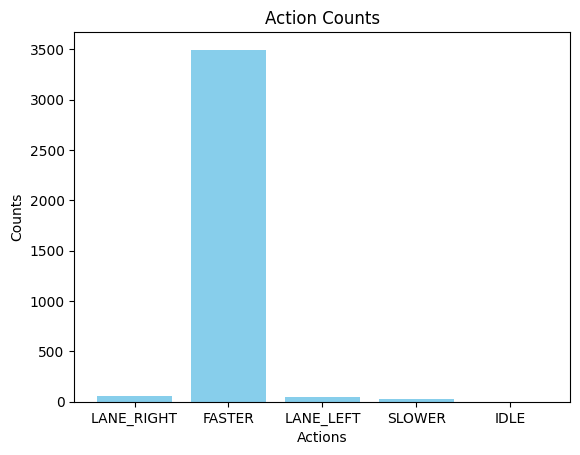

In [42]:
# Extract action names and counts
action_names = [mapping_action[action] for action in action_counts.keys()]
action_values = list(action_counts.values())

# Plot the bar graph
plt.bar(action_names, action_values, color='skyblue')
plt.xlabel('Actions')
plt.ylabel('Counts')
plt.title('Action Counts')
plt.show()

In [1]:
import time
env = gym.make("highway-v0", render_mode="rgb_array", config=config_dict)
state, _ = env.reset()
for _ in range(500):
    action, _states = model.predict(state, deterministic=True)
    state, reward, terminated, truncated, _ = env.step(action)
    env.render()
    time.sleep(0.05)
    if terminated or truncated:
        state = env.reset()

env.close()

NameError: name 'gym' is not defined

In [25]:
from IPython.display import Video

# Display the video
Video("video_model_highway.mp4", embed=True)